In [2]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

d:\CodeFile\intro-to-programming-1-python\pandas + seaborn\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\cheetah\.cache\kagglehub\datasets\yasserh\titanic-dataset\versions\1


In [5]:
df = pd.read_csv(f"{path}/Titanic-Dataset.csv")

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


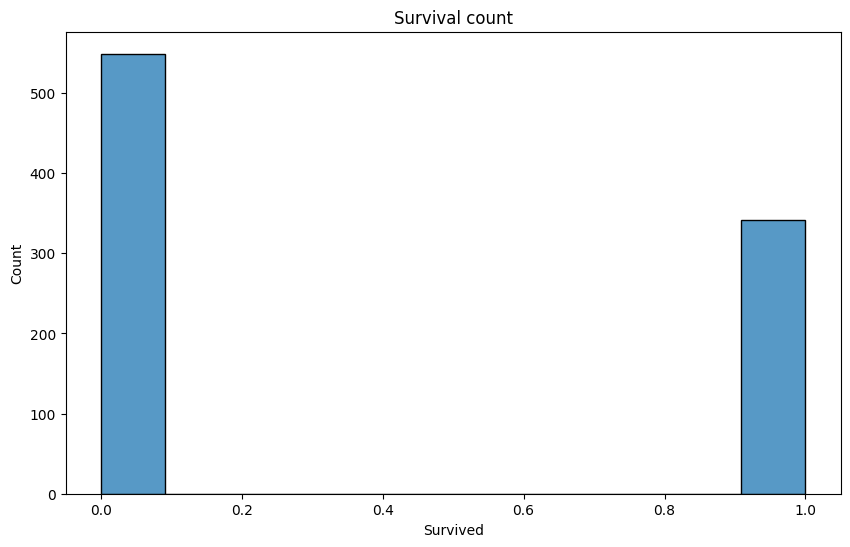

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Survived")
plt.ylabel("Count")
plt.title("Survival count")

plt.show()

we can see that around 340 people survived and 530 did not.

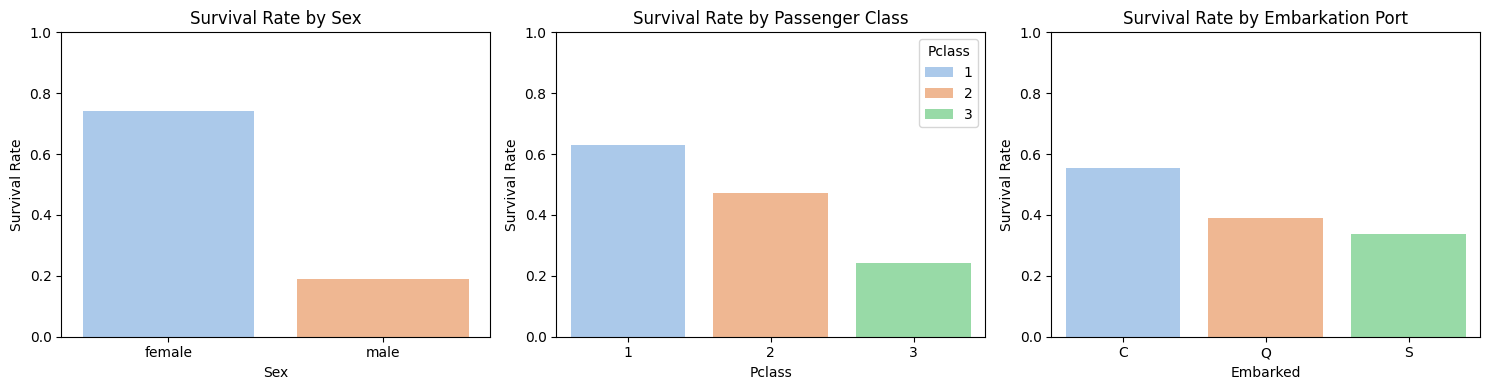

In [16]:
# Compute survival rates and plot bar charts by Sex, Pclass, and Embarked
import matplotlib.pyplot as plt
import seaborn as sns

# Survival rate by sex
surv_by_sex = df.groupby('Sex', dropna=False)['Survived'].mean().reset_index()

# Survival rate by passenger class
surv_by_pclass = df.groupby('Pclass')['Survived'].mean().reset_index()

# Survival rate by embarkation port (drop missing ports)
surv_by_embark = df.dropna(subset=['Embarked']).groupby('Embarked')['Survived'].mean().reset_index()

plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
sns.barplot(data=surv_by_sex, x='Sex', y='Survived', palette='pastel', hue='Sex')
plt.ylabel("Survival Rate")
plt.ylim(0,1)
plt.title('Survival Rate by Sex')

plt.subplot(1,3,2)
sns.barplot(data=surv_by_pclass, x='Pclass', y='Survived', palette='pastel', hue='Pclass')
plt.ylabel("Survival Rate")
plt.ylim(0,1)
plt.title('Survival Rate by Passenger Class')

plt.subplot(1,3,3)
sns.barplot(data=surv_by_embark, x='Embarked', y='Survived', palette='pastel', hue='Embarked')
plt.ylim(0,1)
plt.ylabel("Survival Rate")
plt.title('Survival Rate by Embarkation Port')

plt.tight_layout()
plt.show()

To have the best chance to survived the titanic, you need to be female with Passenger class 1 and Embarkation pron C

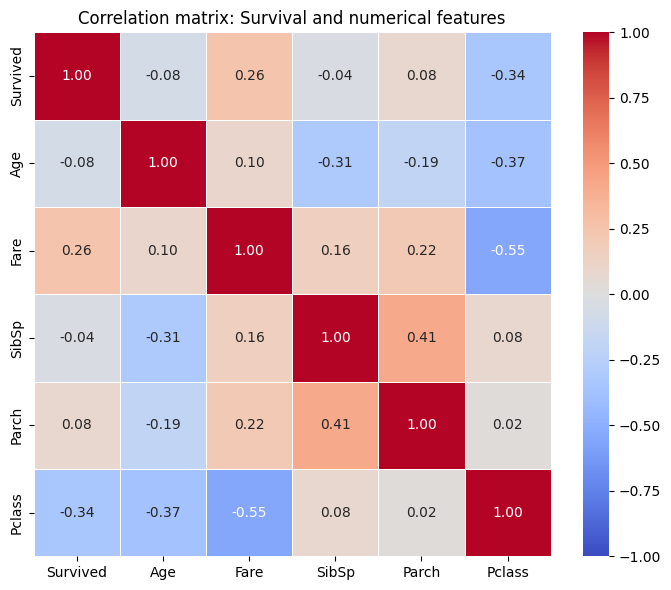

In [23]:
num_cols = ['Survived', 'Age', 'Fare', 'SibSp', 'Parch', 'Pclass']

# Compute correlation (pairwise, ignores NaNs)
corr = df[num_cols].corr()

plt.figure(figsize=(7,6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation matrix: Survival and numerical features')
plt.tight_layout()
plt.show()

<Axes: xlabel='Survived', ylabel='Fare'>

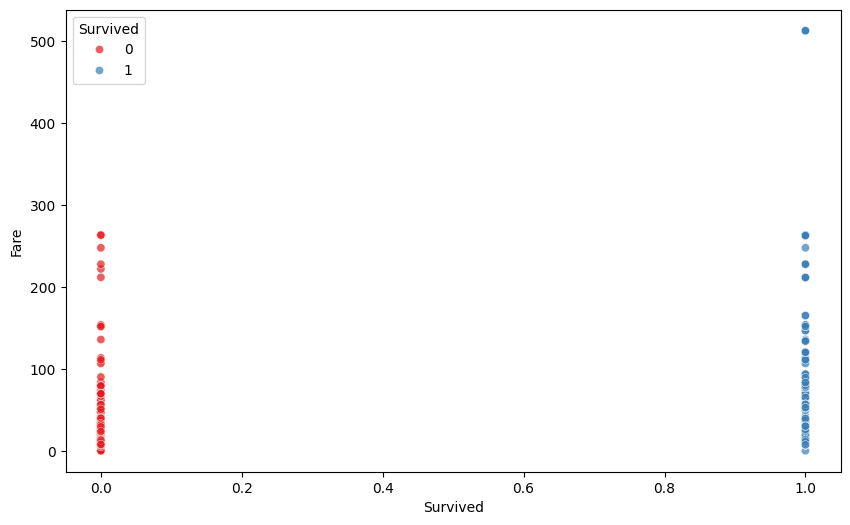

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Survived', y='Fare', hue='Survived', palette='Set1', alpha=0.7)

# Conclusions

## How to have the best chance to survived in titatic
### There are 4 factors at play. Ranking from biggest factor to smallest significant factor.
1. Sex
    1. Female have a survival chance at around 75%
    2. Male have a survival chance at around 20%
2. Passenger class
    1. class 1 have around 60% chance to survived
    2. class 2 have approximatly 45% chance to survived
    3. class 3 have a little over 20% chance to survived the titanic
3. Embarkation port
    1. Port C have around 55% chance to survived
    2. Port Q have around 40% chance to survived
    3. Port S have around 35% chance to survived
4. Fare price
    1. basically if you pay more, there are a little mroe chance to survived, still significant, but small